In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv('pet_adoption_data.csv')
df.shape

(2007, 13)

In [3]:
df.head()

,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [4]:
df.drop(['pet_id'],axis=1,inplace=True)

<Axes: xlabel='adoption_likelihood'>

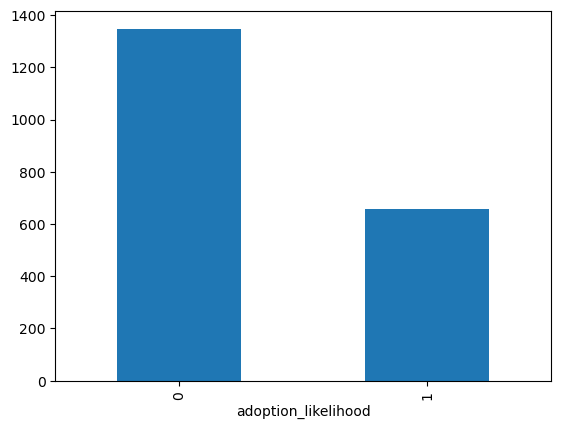

In [6]:
df['adoption_likelihood'].value_counts().plot(kind='bar')

<Axes: >

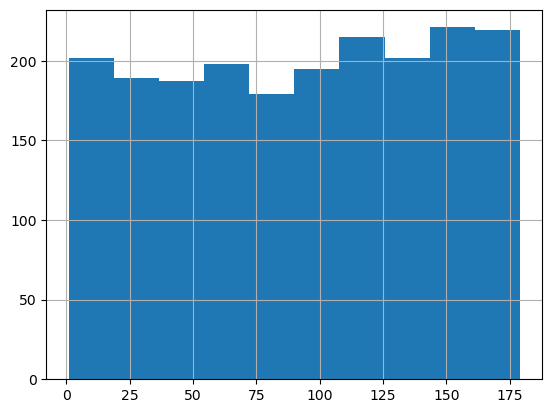

In [7]:
df['age_months'].hist(bins=10)

<Axes: >

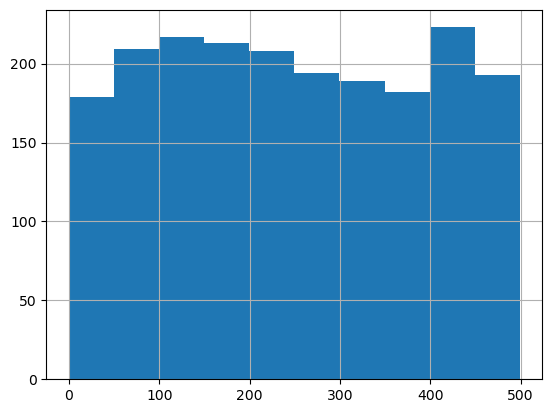

In [8]:
df['adoption_fee'].hist(bins=10)

In [9]:
df['size']=df['size'].map({'Small':1,'Medium':2,'Large':3})


In [10]:
df.head(2)

,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,Bird,Parakeet,131,Orange,3,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,3,16.086727,0,0,8,235,0,0


In [11]:
df1=pd.get_dummies(df,columns=['color','pet_type','breed'],drop_first=True)

In [12]:
df1.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,5.039768,1,0,27,140,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,16.086727,0,0,8,235,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,2.076286,0,0,85,385,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,3.339423,0,0,61,217,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,20.498100,0,0,28,14,1,0,False,...,False,False,False,True,False,False,False,False,True,False


In [18]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scale=MinMaxScaler()
df1['weight_kg']=scale.fit_transform(df1[['weight_kg']])

In [21]:
scale1=StandardScaler()
df1['adoption_fee']=scale1.fit_transform(df[['adoption_fee']])


In [24]:
df1.drop(['adoptiom_fee'],axis=1,inplace=True)
df1.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,0.138783,1,0,27,-0.764025,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,0.520009,0,0,8,-0.098998,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,0.036514,0,0,85,0.951044,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,0.080105,0,0,61,-0.225003,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,0.672244,0,0,28,-1.646060,1,0,False,...,False,False,False,True,False,False,False,False,True,False


In [38]:
X=df1.drop('adoption_likelihood',axis=1)
y=df1['adoption_likelihood']
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: adoption_likelihood, dtype: int64

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
yp=model.predict(X_test)
from sklearn.metrics import classification_report
rep=classification_report(y_test,yp)

In [40]:
print(rep)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       403
           1       0.76      0.86      0.81       200

    accuracy                           0.86       603
   macro avg       0.84      0.86      0.85       603
weighted avg       0.87      0.86      0.86       603



In [43]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=5,max_leaf_nodes=10)
model1.fit(X_train,y_train)
yp=model1.predict(X_test)
from sklearn.metrics import classification_report
rep=classification_report(y_test,yp)
print(rep)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       403
           1       0.93      0.76      0.84       200

    accuracy                           0.90       603
   macro avg       0.91      0.87      0.88       603
weighted avg       0.90      0.90      0.90       603



In [45]:
from sklearn.tree import export_text
print(export_text(model1,feature_names=list(X.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- pet_type_Dog <= 0.50
|   |   |   |--- class: 0
|   |   |--- pet_type_Dog >  0.50
|   |   |   |--- class: 0
|--- vaccinated >  0.50
|   |--- health_condition <= 0.50
|   |   |--- age_months <= 23.50
|   |   |   |--- class: 1
|   |   |--- age_months >  23.50
|   |   |   |--- size <= 2.50
|   |   |   |   |--- size <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- size >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- size >  2.50
|   |   |   |   |--- breed_Labrador <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- breed_Labrador >  0.50
|   |   |   |   |   |--- class: 1
|   |--- health_condition >  0.50
|   |   |--- age_months <= 23.00
|   |   |   |--- class: 0
|   |   |--- age_months >  23.00
|   |   |   |--- class: 0

